바이크 쉐어링 디멘드라는 csv 파일을 가져와서 데이터를 분석할 예정이다. 
현재 주피터 노트북을 저장했을 때의 위치에 'bike_train.csv' 파일을 넣어두자 

모델링.md 파일을 참조

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시계열데이터(Time Series)
- 데이터가 시간의 순서대로(상관있게) 수집된 데이터 
- 우리가 마주할 데이터는 시간당 발생한 데이터 

## pandas 복습해보기

In [4]:
# 바이크 쉐어링 디멘드 데이터 셋 csv 가져오기
rd = pd.read_csv('./bike_train.csv')

In [6]:
# 데이터의 범위 
rd.shape

(10886, 12)

In [ ]:
# 데이터의 차원 
rd.ndim

In [5]:
                  #'datetime'열이 안나와서 모든 속성값을 불러옴  
round(rd.describe(include='all'), 2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-02-10 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,NaN,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14
min,NaN,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,NaN,2.00,0.00,0.00,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,NaN,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,NaN,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00


In [6]:
rd.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-02-10 14:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886,NaN,NaN,NaN,2.50661,1.11617,1,2,3,4,4
holiday,10886,NaN,NaN,NaN,0.0285688,0.166599,0,0,0,0,1
workingday,10886,NaN,NaN,NaN,0.680875,0.466159,0,0,1,1,1
weather,10886,NaN,NaN,NaN,1.41843,0.633839,1,1,1,2,4
temp,10886,NaN,NaN,NaN,20.2309,7.79159,0.82,13.94,20.5,26.24,41
atemp,10886,NaN,NaN,NaN,23.6551,8.4746,0.76,16.665,24.24,31.06,45.455
humidity,10886,NaN,NaN,NaN,61.8865,19.245,0,47,62,77,100
windspeed,10886,NaN,NaN,NaN,12.7994,8.16454,0,7.0015,12.998,16.9979,56.9969
casual,10886,NaN,NaN,NaN,36.022,49.9605,0,4,17,49,367


In [7]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## date time 컬럼을 인덱스로 만들어주기 
1. 데이터 타입 바꾸기 
2. 인덱스로 변경시 해당 데이터를 사용할 수 없기 때문에 데이트 타임 컬럼 하나 더 생성하기 

1. 타입 바꾸기 

In [8]:
# 타입 바꾸기 데이트타입의 타입의 문자 타입을 => datetime.type(날짜,시간)으로 바꾸기 
rd['datetime'] = pd.to_datetime(rd['datetime'])

2. datetime 컬럼 만들기

In [9]:
rd['date_time'] = rd['datetime']

In [10]:
# 타입이 바뀐 것을 볼 수 있다.
# date_time 컬럼이 하나 생긴것이 확인된다.
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date_time   10886 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(8)
memory usage: 1.1 MB


3. datetime 컬럼을 인덱스로 지정

In [11]:
                        # inplace = True를 지정해야 원본값에 변경값이 저장됨 내비둘 경우 원본값에 저장되지 않고 현 결과값에만 저장됨
rd.set_index('date_time', inplace=True)

In [12]:
#date_time이 인덱스로 되었고
#기존 datetime은 항목이 되었다. 
rd

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
date_time,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [3]:
# asfreq 시계열 데이터를 사용자가 지정하는 임의의 빈도로 나타내는 것 

                #시계열 데이터를 사용자에 알맞게 바꿔주는 곳 (H = hour/시간)
                            #이건 기억안남 
rd = rd.asfreq('H', method='ffill')

NameError: name 'rd' is not defined

In [14]:
rd.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='date_time', length=17256, freq='H')

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


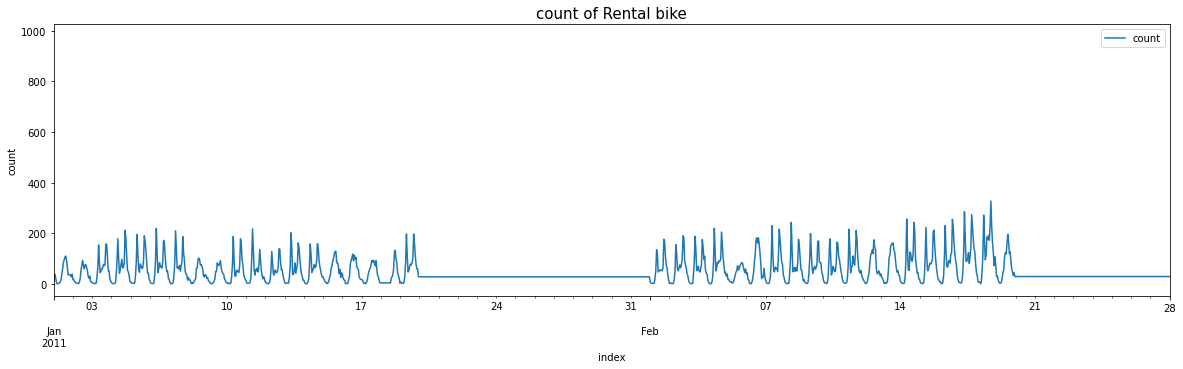

In [15]:
# pandas는 자체적으로 플롯지원                  잘라서보기
rd[['count']].plot(kind='line', figsize=(20,5), xlim=('2011-01-01', '2011-2-28'))
plt.title('count of Rental bike', fontsize=15)
plt.xlabel('index')
plt.ylabel('count')

plt.show()

## 다 그려보자 그냥 
- 데이터에 대해 접근해보기

findfont: Font family ['NanumGothicCoding'] not found. Falling back to DejaVu Sans.


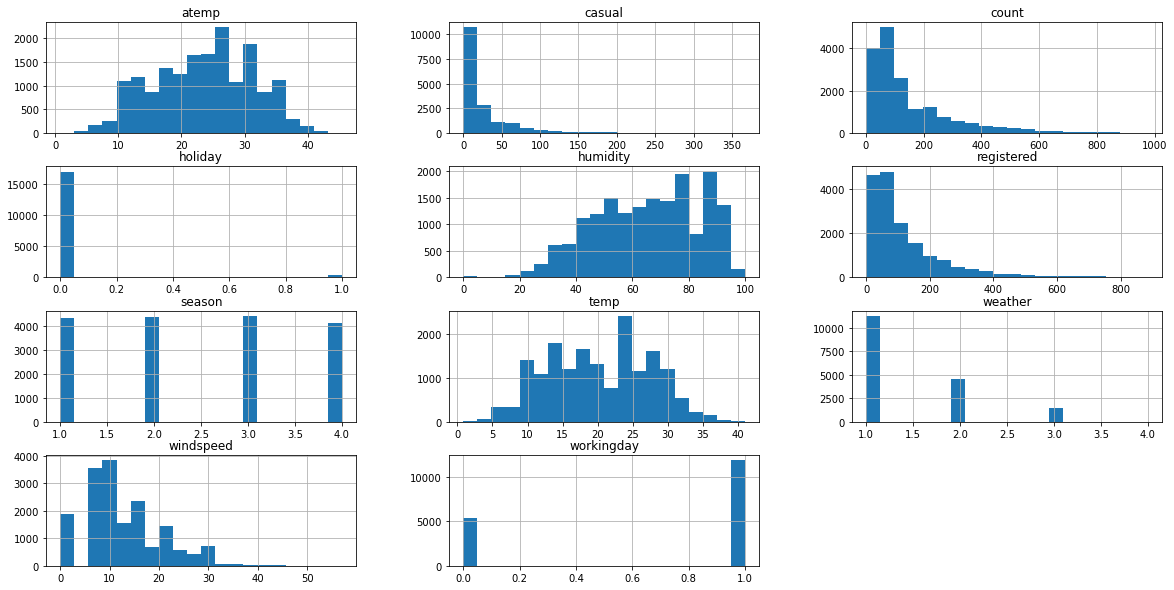

In [16]:
rd.hist(bins=20, figsize=(20,10))
plt.show()

## boxplot 

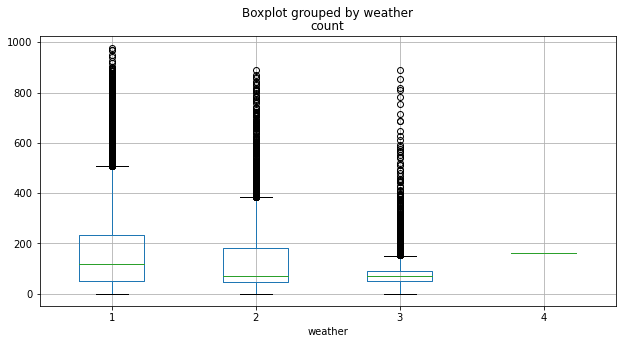

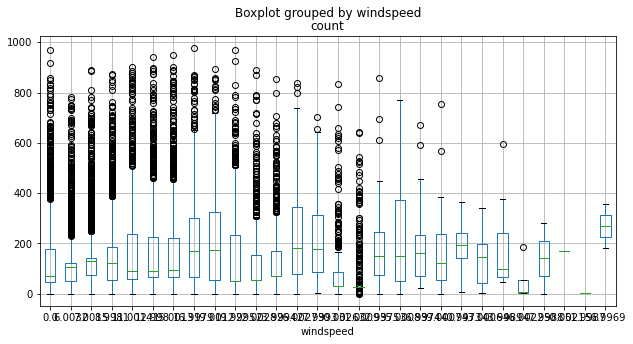

In [17]:
rd.boxplot(column='count', by='weather', figsize=(10, 5))
rd.boxplot(column='count', by='windspeed', figsize=(10, 5))
plt.show()

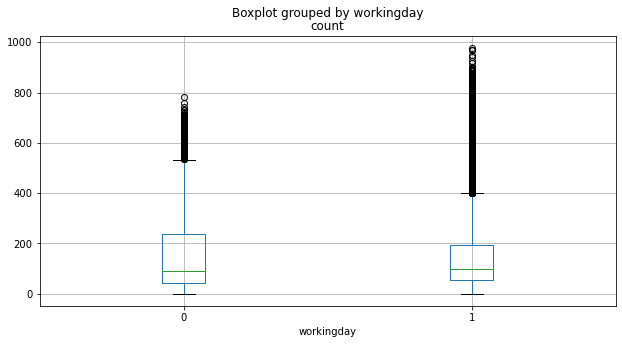

In [21]:
rd.boxplot(column='count', by='workingday', figsize=(10, 5))
plt.show()

In [19]:
rd['holiday'].unique()

array([0, 1], dtype=int64)

In [20]:
rd['season'].unique()

array([1, 2, 3, 4], dtype=int64)

# 12월 15일 

# Feature Engineering 

- Feature Extract
- Feature Select
- 자동화가 쉽지는 않을 것 같음 

In [213]:
rd['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [7]:
            # datetime은 dt라는 속성값을 지니는 데 이를 통해 연월일을 나눌 수 있다.
rd['year']=rd.datetime.dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [42]:
rd['month']=rd.datetime.dt.month 

In [39]:
rd['day']=rd.datetime.dt.day

In [40]:
rd['hour']=rd.datetime.dt.hour

In [8]:
# 1주일 모두 
rd['dow']=rd.datetime.dt.dayofweek

AttributeError: Can only use .dt accessor with datetimelike values

In [46]:
rd

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,day,hour,month,year
date_time,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,1,0,1,2011
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,1,1,1,2011
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,1,2,1,2011
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,1,3,1,2011
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,1,4,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,19,19,12,2012
2012-12-19 20:00:00,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,19,20,12,2012
2012-12-19 21:00:00,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,19,21,12,2012


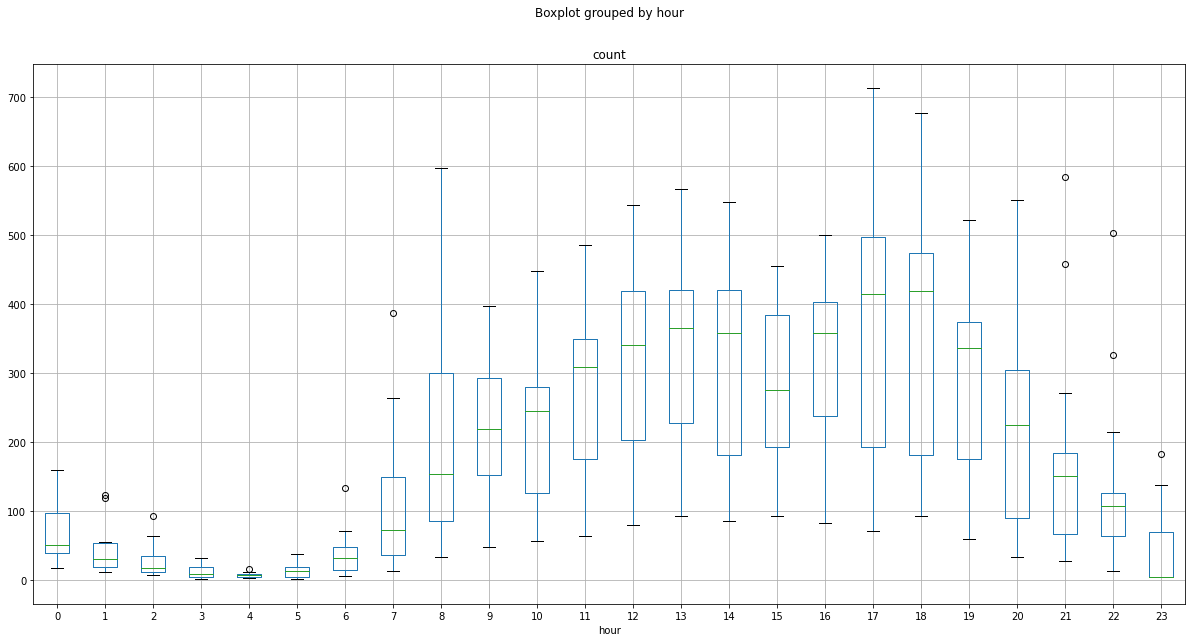

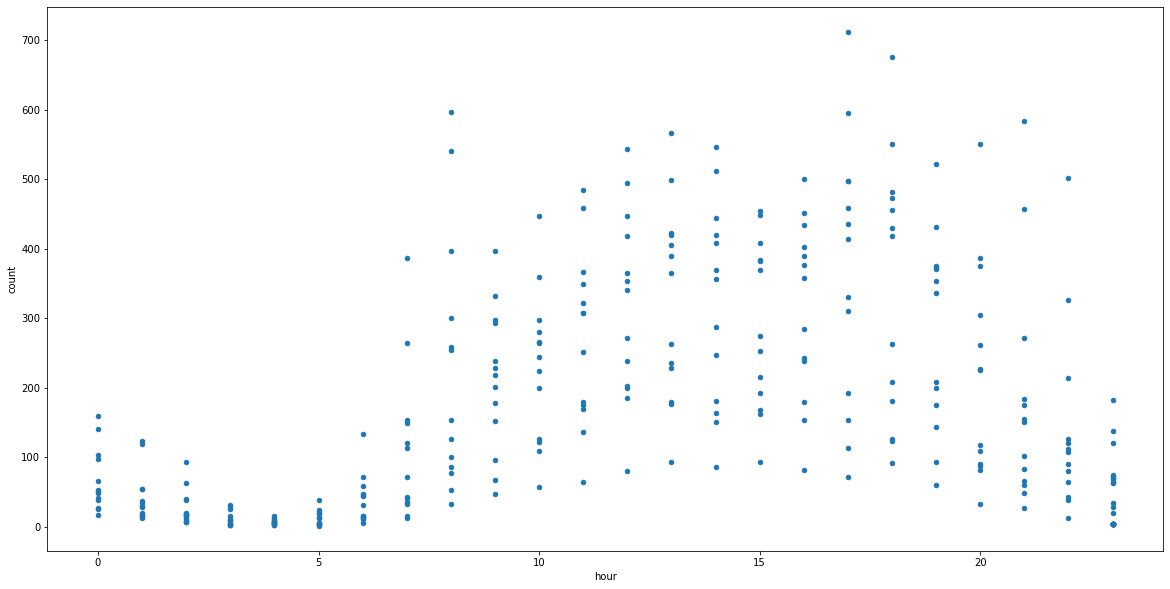

In [60]:
rd[rd['holiday'] == 1].boxplot(column = 'count', by = 'hour', figsize=(20,10))
rd[rd['holiday'] == 1].plot.scatter(y = 'count', x = 'hour', figsize=(20,10))
plt.show()

In [64]:
rd[(rd.year == 2011) & (rd.month == 1) & (rd.day == 1)].dow

date_time
2011-01-01 00:00:00    5
2011-01-01 01:00:00    5
2011-01-01 02:00:00    5
2011-01-01 03:00:00    5
2011-01-01 04:00:00    5
2011-01-01 05:00:00    5
2011-01-01 06:00:00    5
2011-01-01 07:00:00    5
2011-01-01 08:00:00    5
2011-01-01 09:00:00    5
2011-01-01 10:00:00    5
2011-01-01 11:00:00    5
2011-01-01 12:00:00    5
2011-01-01 13:00:00    5
2011-01-01 14:00:00    5
2011-01-01 15:00:00    5
2011-01-01 16:00:00    5
2011-01-01 17:00:00    5
2011-01-01 18:00:00    5
2011-01-01 19:00:00    5
2011-01-01 20:00:00    5
2011-01-01 21:00:00    5
2011-01-01 22:00:00    5
2011-01-01 23:00:00    5
Freq: H, Name: dow, dtype: int64

5 = 토요일 \
6 - 일요일

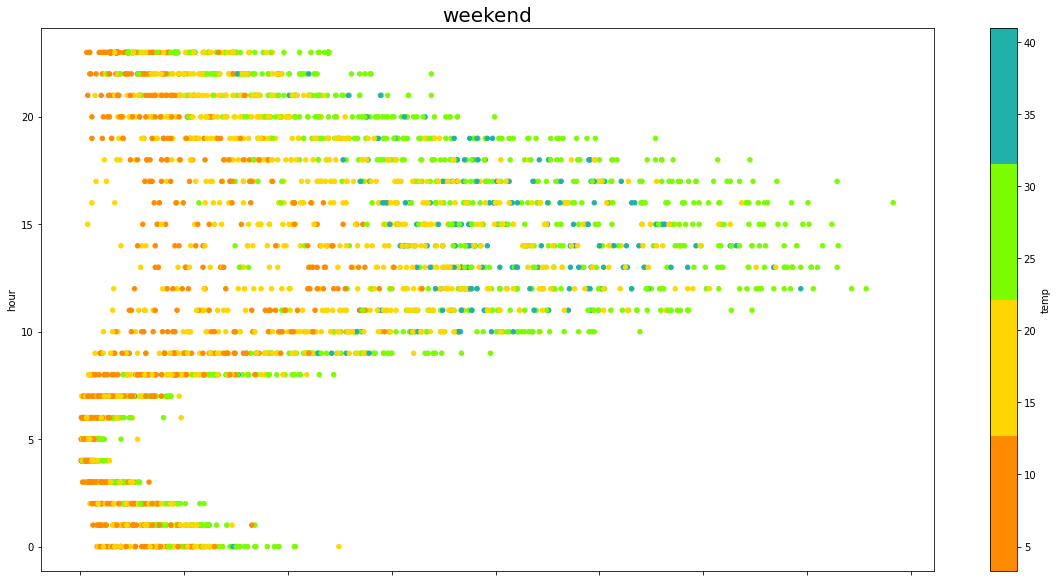

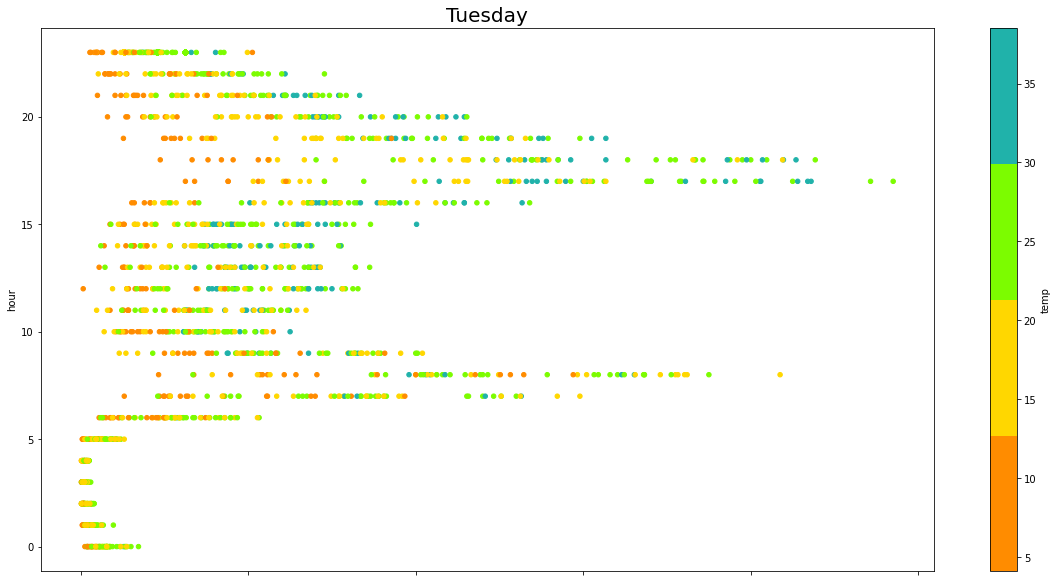

In [93]:
# 화려한 그래프를 그리기 위한 색상 도입 
from matplotlib.colors import ListedColormap
# 원하는 색깔을 섞어주는 것 
cmap = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
                                                                        # 온도에 색상을 해당시킴 
rd[(rd.dow == 5) | (rd.dow == 6)].plot.scatter(x = 'count', y = 'hour', c='temp', figsize=(20,10), colormap=cmap)
plt.title('weekend', size = 20)
rd[(rd.dow == 1)].plot.scatter(x = 'count', y = 'hour', c='temp', figsize=(20,10), colormap=cmap)
plt.title('Tuesday', size = 20)
plt.show()

In [ ]:
rd[(rd.dow == 5) | (rd.dow == 6)].plot.scatter(x = 'count', y = 'hour', c='temp', figsize=(20,10), colormap=cmap)

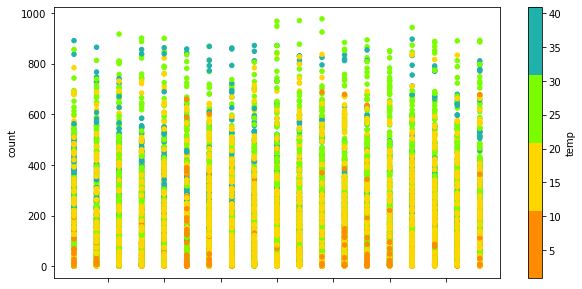

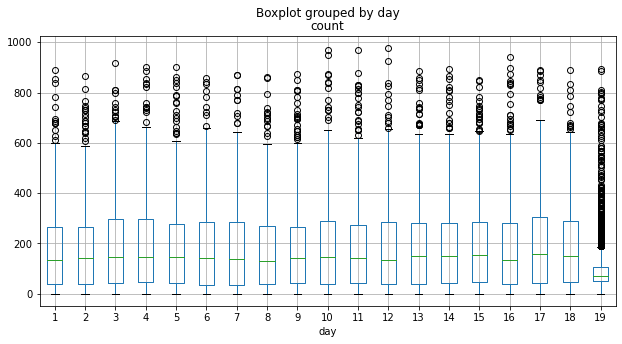

In [101]:
# 일자로 본 자전거 대여 수 
rd.plot.scatter(y='count', x='day', c='temp', figsize=(10,5), colormap=cmap)
rd.boxplot(column='count', by='day', figsize=(10,5))

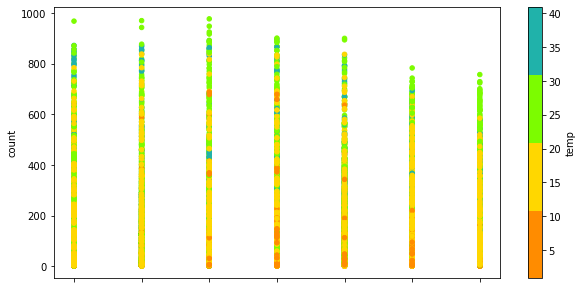

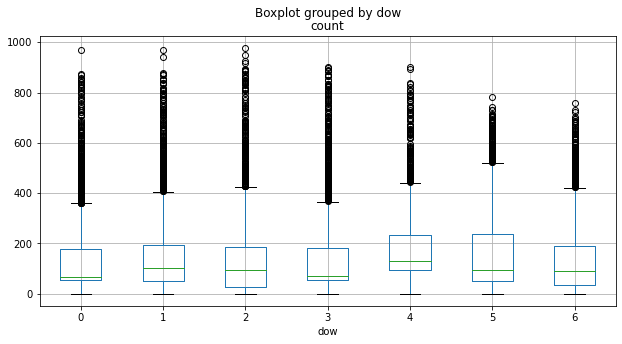

In [105]:
# 주별로 찾아보기 
rd.plot.scatter(y='count', x='dow', c='temp', figsize=(10,5), colormap=cmap)
rd.boxplot(column='count', by='dow', figsize=(10,5))

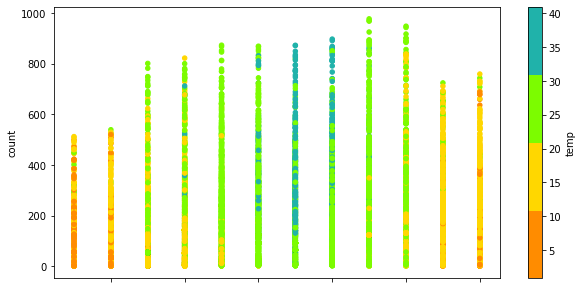

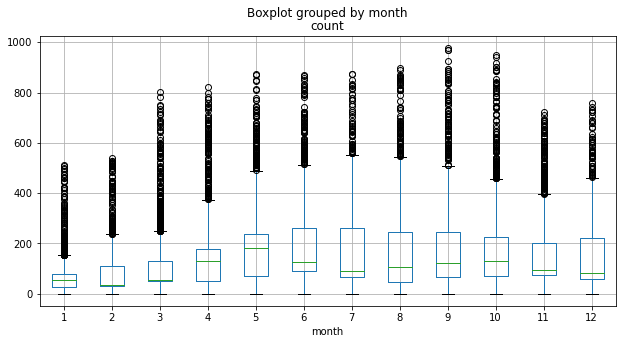

In [102]:
# 월별로 본 자전거 대여 수 
rd.plot.scatter(y='count', x='month', c='temp', figsize=(10,5), colormap=cmap)
rd.boxplot(column='count', by='month', figsize=(10,5))

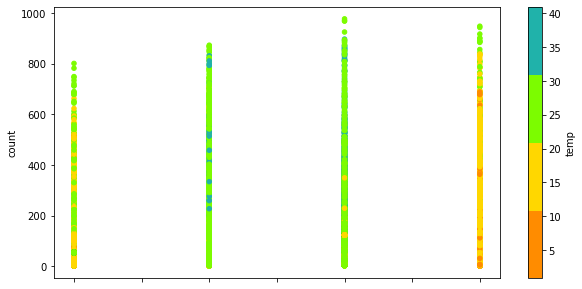

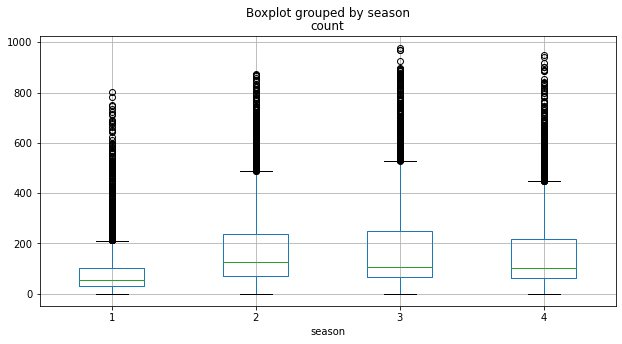

In [106]:
# 시즌별로 찾아보기 
rd.plot.scatter(y='count', x='season', c='temp', figsize=(10,5), colormap=cmap)
rd.boxplot(column='count', by='season', figsize=(10,5))

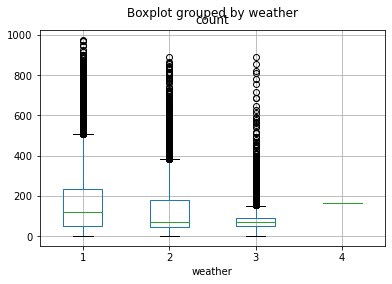

In [107]:
rd.boxplot(column='count', by='weather')

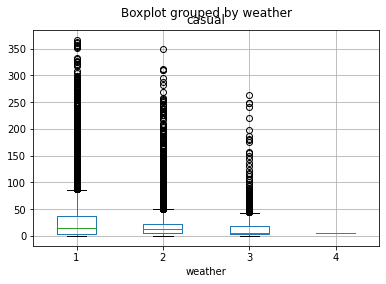

In [108]:
rd.boxplot(column='casual', by='weather')

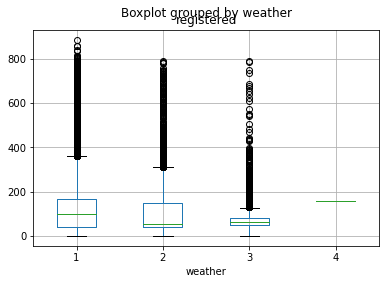

In [110]:
rd.boxplot(column='registered', by='weather')

# pivot_table

In [111]:
rd.groupby(['weather', 'holiday']).describe()

season                                                \
                   count      mean       std  min   25%  50%  75%  max   
weather holiday                                                          
1       0        11091.0  2.432783  1.116748  1.0  1.00  2.0  3.0  4.0   
        1          205.0  2.717073  1.141014  1.0  2.00  3.0  4.0  4.0   
2       0         4410.0  2.526984  1.137944  1.0  1.00  3.0  3.0  4.0   
        1           92.0  2.663043  1.102217  1.0  1.75  3.0  3.0  4.0   
3       0         1430.0  2.700000  0.902644  1.0  2.00  3.0  3.0  4.0   
        1           27.0  1.851852  1.261980  1.0  1.00  1.0  3.0  4.0   
4       0            1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0   

                workingday            ... month           year               \
                     count      mean  ...   75%   max    count         mean   
weather holiday                       ...                                     
1       0          11091.0  0.687044  ...   9.0  12.0  11091.0  2011.487152   
        1            205.0  0.000000  ...  10.0  11.0    205.0  2011.634146   
2       0           4410.0  0.697052  ...   9.0  12.0   4410.0  2011.511111   
        1             92.0  0.000000  ...   9.0  11.0     92.0  2011.347826   
3       0           1430.0  0.853846  ...   8.0  12.0   1430.0  2011.468531   
        1             27.0  0.000000  ...   9.0  11.0     27.0  2011.222222   
4       0              1.0  1.000000  ...   1.0   1.0      1.0  2012.000000   

                                                                   
                      std     min     25%     50%     75%     max  
weather holiday                                                    
1       0        0.499857  2011.0  2011.0  2011.0  2012.0  2012.0  
        1        0.482848  2011.0  2011.0  2012.0  2012.0  2012.0  
2       0        0.499933  2011.0  2011.0  2012.0  2012.0  2012.0  
        1        0.478890  2011.0  2011.0  2011.0  2012.0  2012.0  
3       0        0.499183  2011.0  2011.0  2011.0  2012.0  2012.0  
        1        0.423659  2011.0  2011.0  2011.0  2011.0  2012.0  
4       0             NaN  2012.0  2012.0  2012.0  2012.0  2012.0  

[7 rows x 112 columns]

In [123]:
rd.groupby(['weather', 'holiday']).agg({
    'count' : [sum, min, max]
})

count          
                     sum  min  max
weather holiday                   
1       0        1813824    1  977
        1          37424    3  712
2       0         594188    1  890
        1          18561    1  597
3       0         145517    1  891
        1           1878    4  377
4       0            164  164  164

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC53D97550>,
      dtype=object)

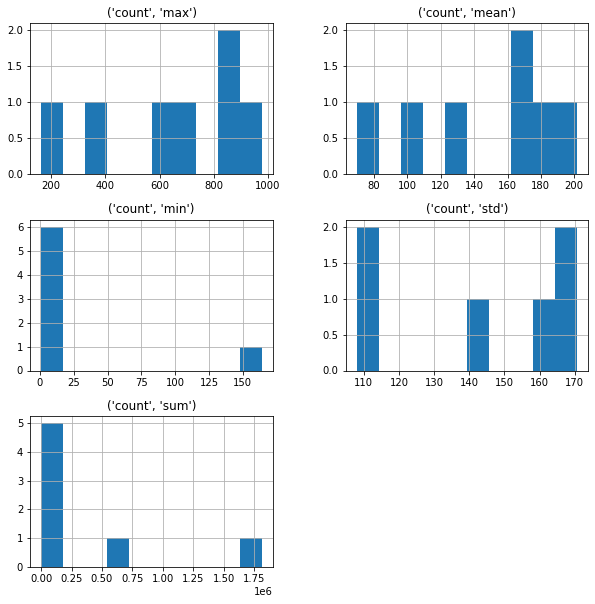

In [127]:
rd.groupby(['weather', 'holiday']).agg({
    'count' : [sum, min, max, 'mean', 'std']
}).hist(figsize=(10,10))

In [125]:
rd[rd.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,day,hour,month,year
date_time,,,,,,,,,,,,,,,,,
2012-01-09 18:00:00,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,0,9,18,1,2012


In [124]:
rd.groupby(['weather', 'dow']).agg({
    'count' : [sum, min, max]
})

count          
                sum  min  max
weather dow                  
1       0    225052    1  968
        1    239003    1  970
        2    238270    1  977
        3    308198    1  901
        4    261239    1  900
        5    338504    1  743
        6    240982    1  757
2       0    126910    1  842
        1     81740    1  868
        2     95453    1  862
        3     59019    1  890
        4     97155    1  835
        5     75393    1  783
        6     77079    1  571
3       0     13573    2  856
        1     44505    1  819
        2     18941    1  891
        3     32802    1  689
        4     12382    1  565
        5     11669    1  541
        6     13523    1  545
4       0       164  164  164

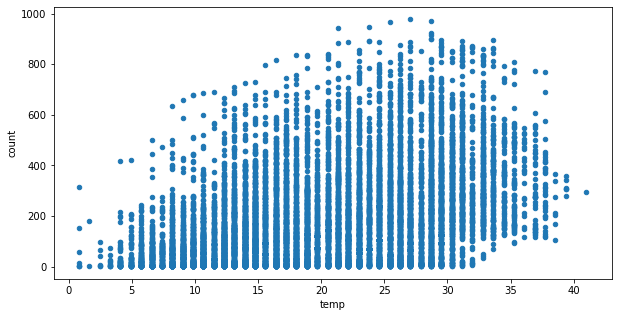

In [131]:
rd.plot.scatter(y='count', x='temp', figsize=(10, 5))

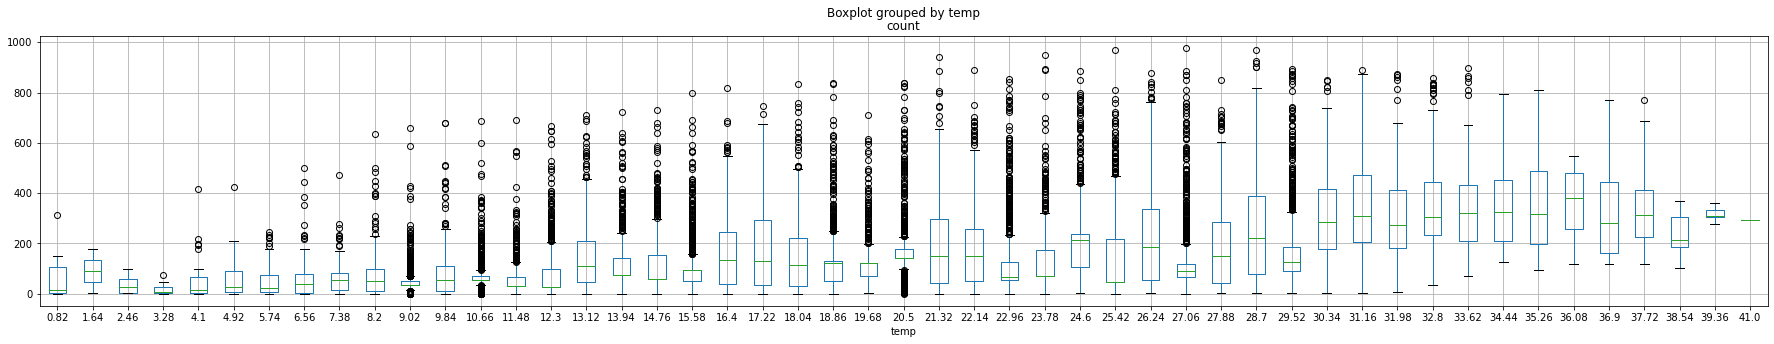

In [136]:
rd.boxplot(column='count', by='temp', figsize=(30,5))

실수형 값들은 연속형 변수라 불리며
이를 분석하기 매우 어렵다. \
의도적으로 범주로 만드는 방법은?

In [146]:
pd.cut(rd.temp, 10).value_counts()

(20.91, 24.928]     3172
(12.874, 16.892]    3001
(16.892, 20.91]     2959
(24.928, 28.946]    2742
(8.856, 12.874]     2483
(28.946, 32.964]    1746
(4.838, 8.856]       677
(32.964, 36.982]     355
(0.78, 4.838]         73
(36.982, 41.0]        48
Name: temp, dtype: int64

In [141]:
rd.groupby(pd.cut(rd['temp'], 10)).describe().T
# 전체의 온도를 10개로 나눠서 하나의 범주로 통합해 보여줌 

temp          (0.78, 4.838]  (4.838, 8.856]  (8.856, 12.874]  \
season count           73.0      677.000000      2483.000000   
       mean             1.0        1.252585         1.670157   
       std              0.0        0.833656         1.229646   
       min              1.0        1.000000         1.000000   
       25%              1.0        1.000000         1.000000   
...                     ...             ...              ...   
year   min           2011.0     2011.000000      2011.000000   
       25%           2011.0     2011.000000      2011.000000   
       50%           2011.0     2011.000000      2012.000000   
       75%           2012.0     2012.000000      2012.000000   
       max           2012.0     2012.000000      2012.000000   

temp          (12.874, 16.892]  (16.892, 20.91]  (20.91, 24.928]  \
season count       3001.000000      2959.000000      3172.000000   
       mean           2.875708         2.587699         2.608134   
       std            1.377273         1.046096         0.984892   
       min            1.000000         1.000000         1.000000   
       25%            1.000000         2.000000         2.000000   
...                        ...              ...              ...   
year   min         2011.000000      2011.000000      2011.000000   
       25%         2011.000000      2011.000000      2011.000000   
       50%         2011.000000      2012.000000      2011.000000   
       75%         2012.000000      2012.000000      2012.000000   
       max         2012.000000      2012.000000      2012.000000   

temp          (24.928, 28.946]  (28.946, 32.964]  (32.964, 36.982]  \
season count       2742.000000       1746.000000        355.000000   
       mean           2.673961          2.707904          2.861972   
       std            0.593200          0.476996          0.345416   
       min            1.000000          1.000000          2.000000   
       25%            2.000000          2.000000          3.000000   
...                        ...               ...               ...   
year   min         2011.000000       2011.000000       2011.000000   
       25%         2011.000000       2011.000000       2011.000000   
       50%         2012.000000       2012.000000       2012.000000   
       75%         2012.000000       2012.000000       2012.000000   
       max         2012.000000       2012.000000       2012.000000   

temp          (36.982, 41.0]  
season count       48.000000  
       mean         2.833333  
       std          0.376622  
       min          2.000000  
       25%          3.000000  
...                      ...  
year   min       2011.000000  
       25%       2012.000000  
       50%       2012.000000  
       75%       2012.000000  
       max       2012.000000  

[128 rows x 10 columns]

In [148]:
rd['temp_group'] = pd.cut(rd['temp'],10)

In [149]:
rd

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,day,hour,month,year,temp_group
date_time,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,1,0,1,2011,"(8.856, 12.874]"
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,1,1,1,2011,"(8.856, 12.874]"
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,1,2,1,2011,"(8.856, 12.874]"
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,1,3,1,2011,"(8.856, 12.874]"
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,1,4,1,2011,"(8.856, 12.874]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,19,19,12,2012,"(12.874, 16.892]"
2012-12-19 20:00:00,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,19,20,12,2012,"(12.874, 16.892]"
2012-12-19 21:00:00,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,19,21,12,2012,"(12.874, 16.892]"


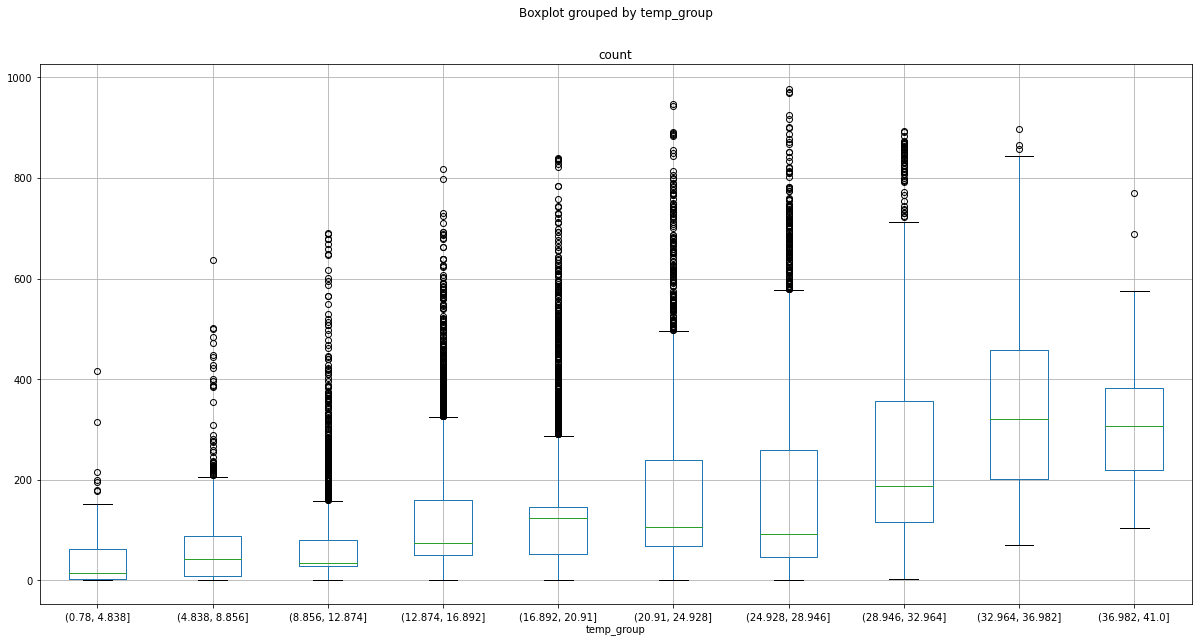

In [151]:
rd.boxplot(column='count', by='temp_group', figsize=(20,10))

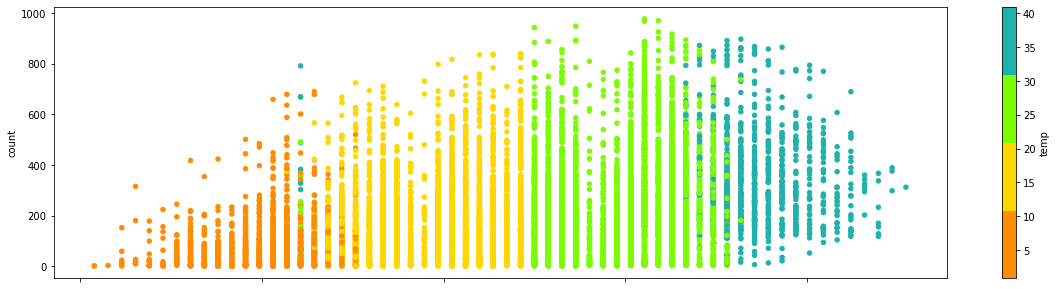

In [157]:
rd.plot.scatter(x='atemp', y='count', c='temp', figsize=(20,5), colormap=cmap)

# 체감 온도를 구간별로 나누고 구간별 박스플롯을 그려보자 

In [160]:
pd.cut(rd.temp, 10).value_counts()

(20.91, 24.928]     3172
(12.874, 16.892]    3001
(16.892, 20.91]     2959
(24.928, 28.946]    2742
(8.856, 12.874]     2483
(28.946, 32.964]    1746
(4.838, 8.856]       677
(32.964, 36.982]     355
(0.78, 4.838]         73
(36.982, 41.0]        48
Name: temp, dtype: int64

In [161]:
pd.cut(rd.atemp,10).value_counts()

(23.108, 27.577]    3910
(27.577, 32.046]    2960
(18.638, 23.108]    2898
(9.699, 14.168]     2289
(14.168, 18.638]    2240
(32.046, 36.516]    1977
(36.516, 40.985]     440
(5.23, 9.699]        432
(40.985, 45.455]      65
(0.715, 5.23]         45
Name: atemp, dtype: int64

In [163]:
rd['atemp_group'] = pd.cut(rd.atemp,10)
rd

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,day,hour,month,year,temp_group,atemp_group
date_time,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,5,1,0,1,2011,"(8.856, 12.874]","(14.168, 18.638]"
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,1,1,1,2011,"(8.856, 12.874]","(9.699, 14.168]"
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,5,1,2,1,2011,"(8.856, 12.874]","(9.699, 14.168]"
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,5,1,3,1,2011,"(8.856, 12.874]","(14.168, 18.638]"
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,5,1,4,1,2011,"(8.856, 12.874]","(14.168, 18.638]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2,19,19,12,2012,"(12.874, 16.892]","(18.638, 23.108]"
2012-12-19 20:00:00,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2,19,20,12,2012,"(12.874, 16.892]","(14.168, 18.638]"
2012-12-19 21:00:00,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2,19,21,12,2012,"(12.874, 16.892]","(14.168, 18.638]"


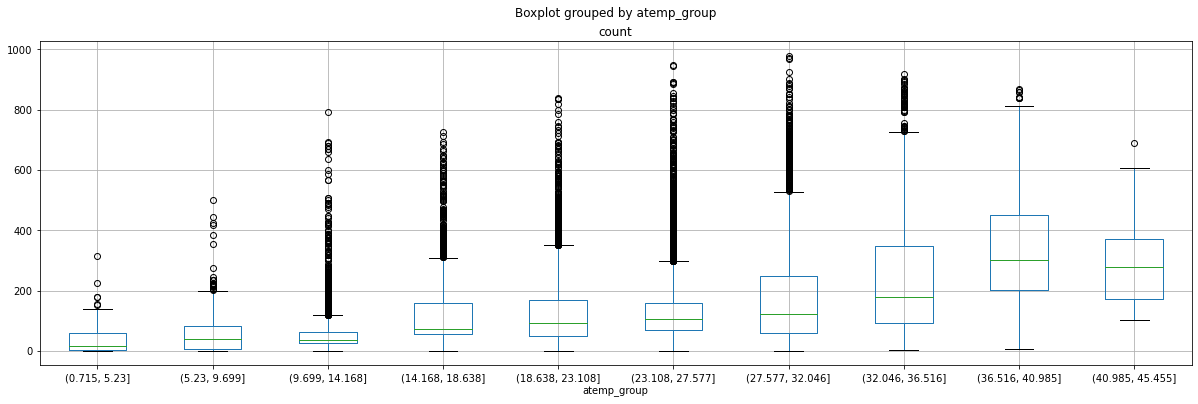

In [168]:
rd.boxplot(column='count', by='atemp_group', figsize=(20,6))

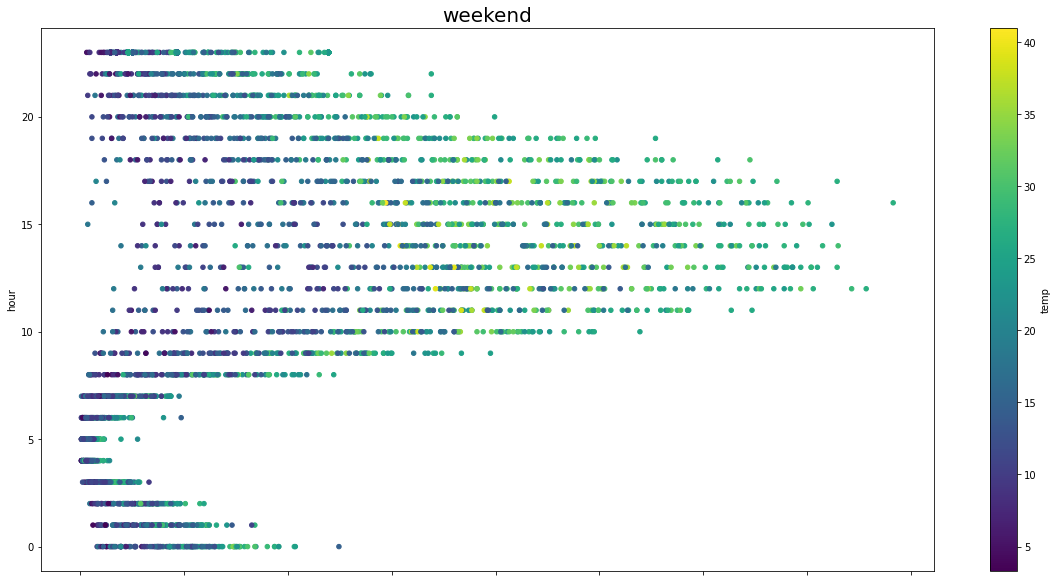

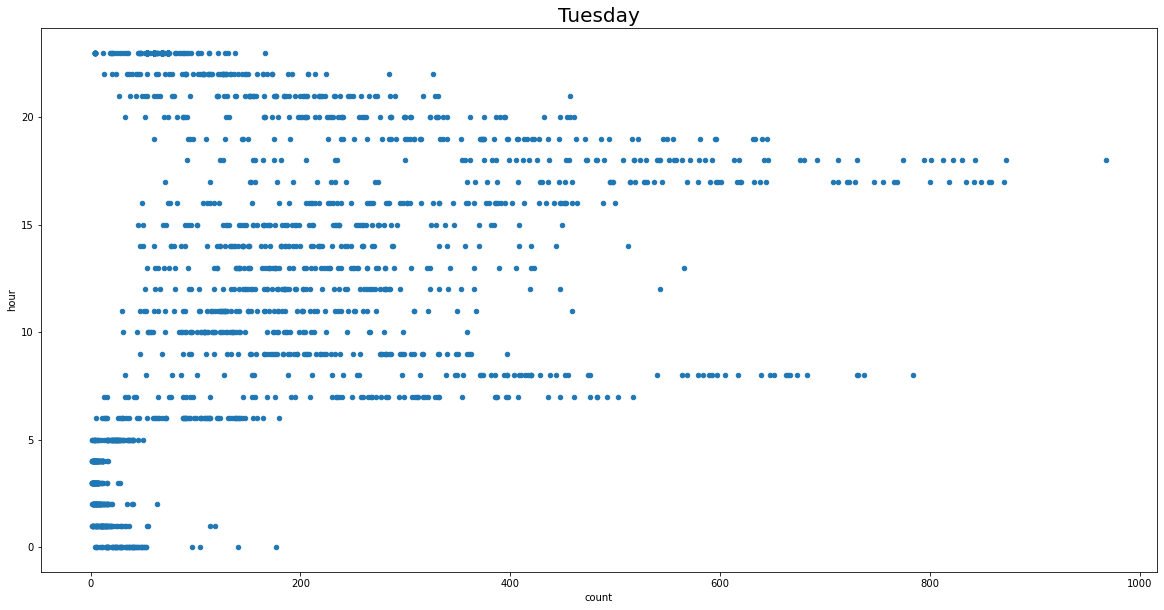

In [85]:
rd[(rd.dow == 5) | (rd.dow == 6)].plot.scatter(x = 'count', y = 'hour', c='temp', figsize=(20,10), colormap='viridis')
plt.title('weekend', size = 20)
rd[(rd.dow == 0)].plot.scatter(x = 'count', y = 'hour', figsize=(20,10))
plt.title('Tuesday', size = 20)
plt.show()

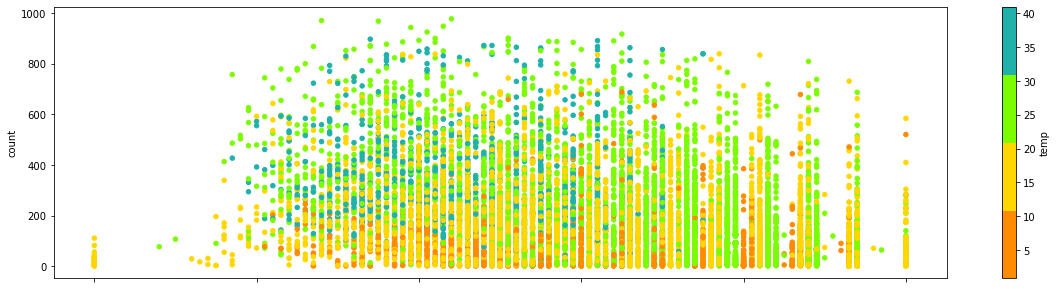

In [171]:
rd.plot.scatter(y='count', x='humidity', c='temp', figsize=(20,5), colormap=cmap)

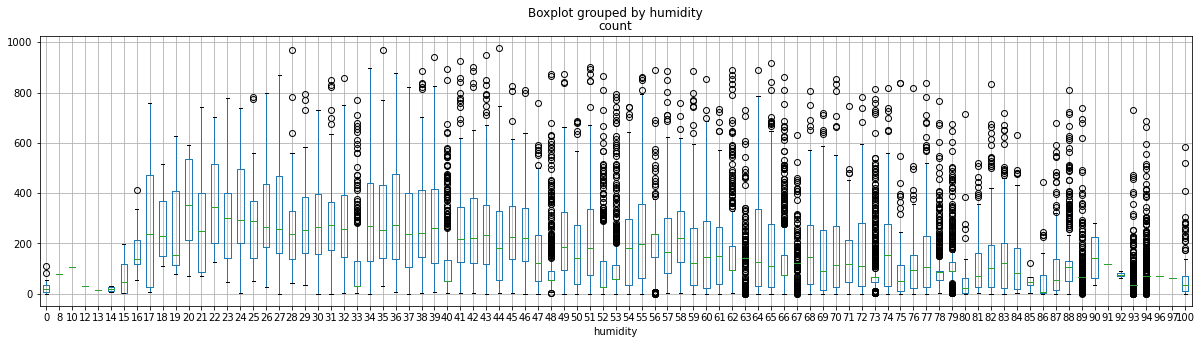

In [172]:
rd.boxplot(column='count', by='humidity', figsize=(20,5))

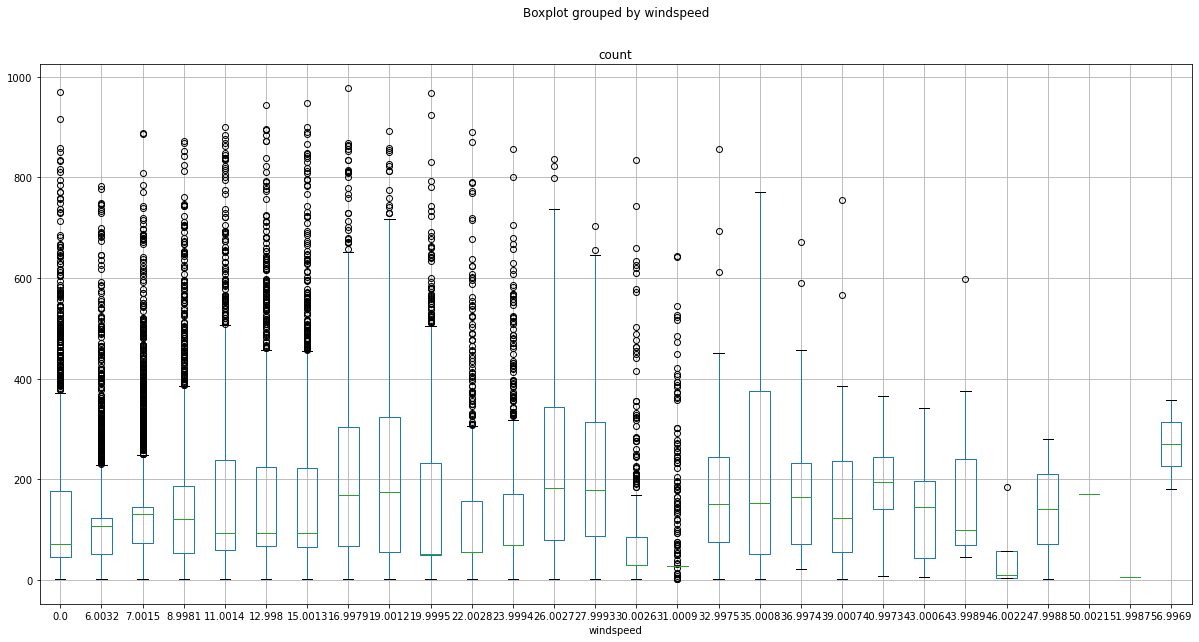

In [181]:
rd.boxplot(column = 'count', by = 'windspeed', figsize=(20,10))

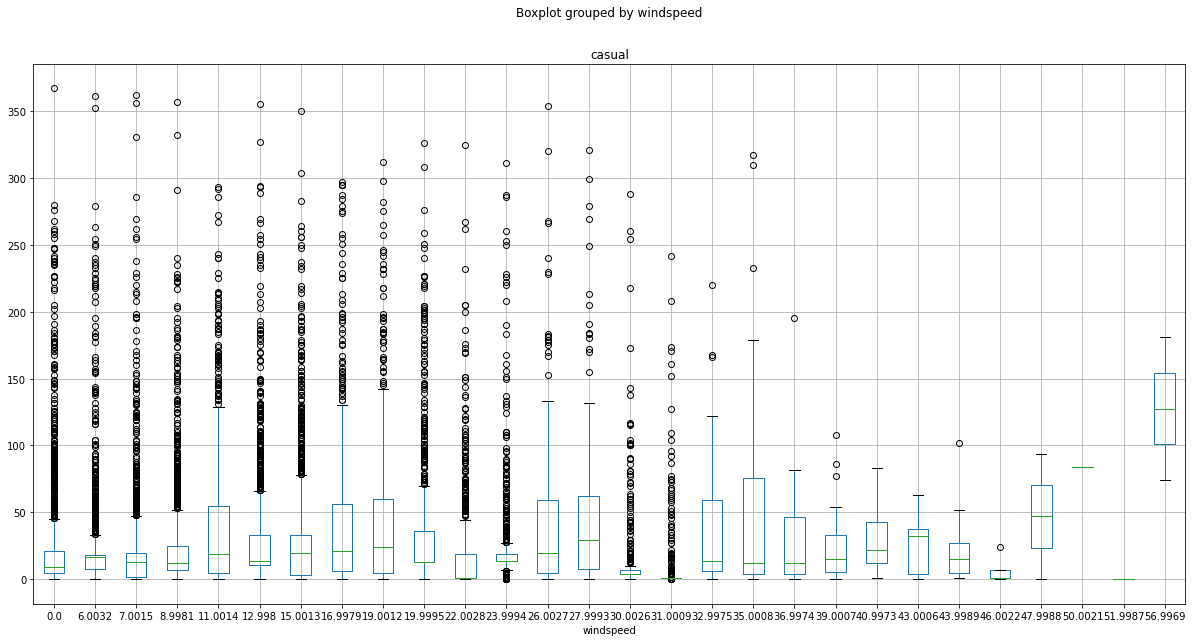

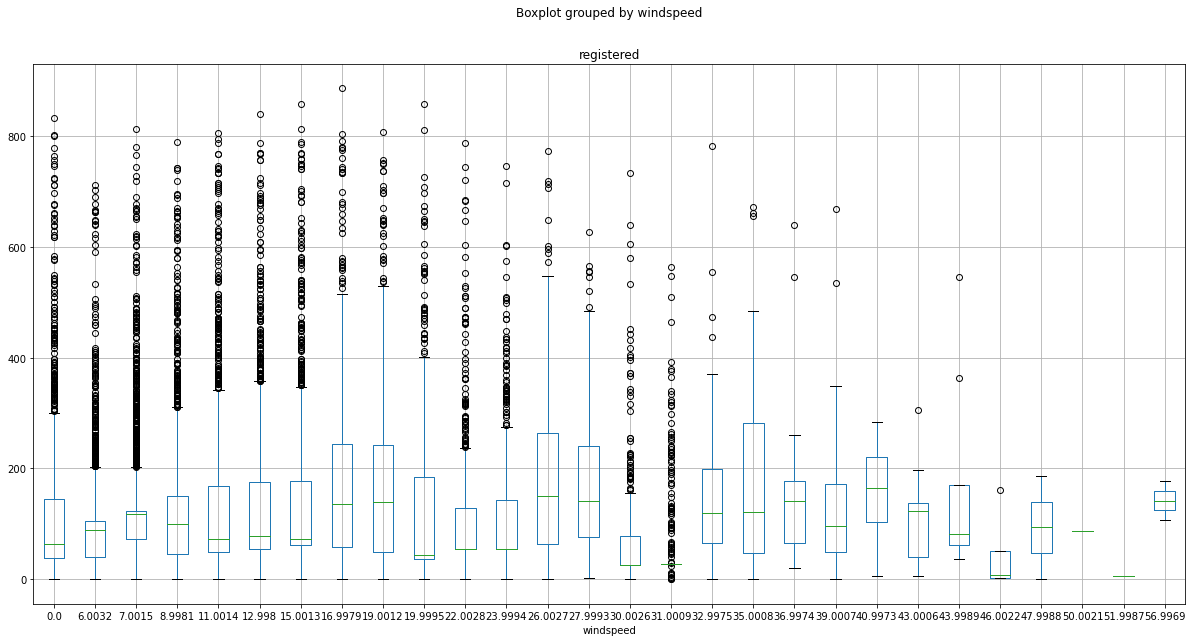

In [186]:
rd.boxplot(column='casual', by='windspeed', figsize=(20,10))
rd.boxplot(column = 'registered', by = 'windspeed', figsize=(20,10))

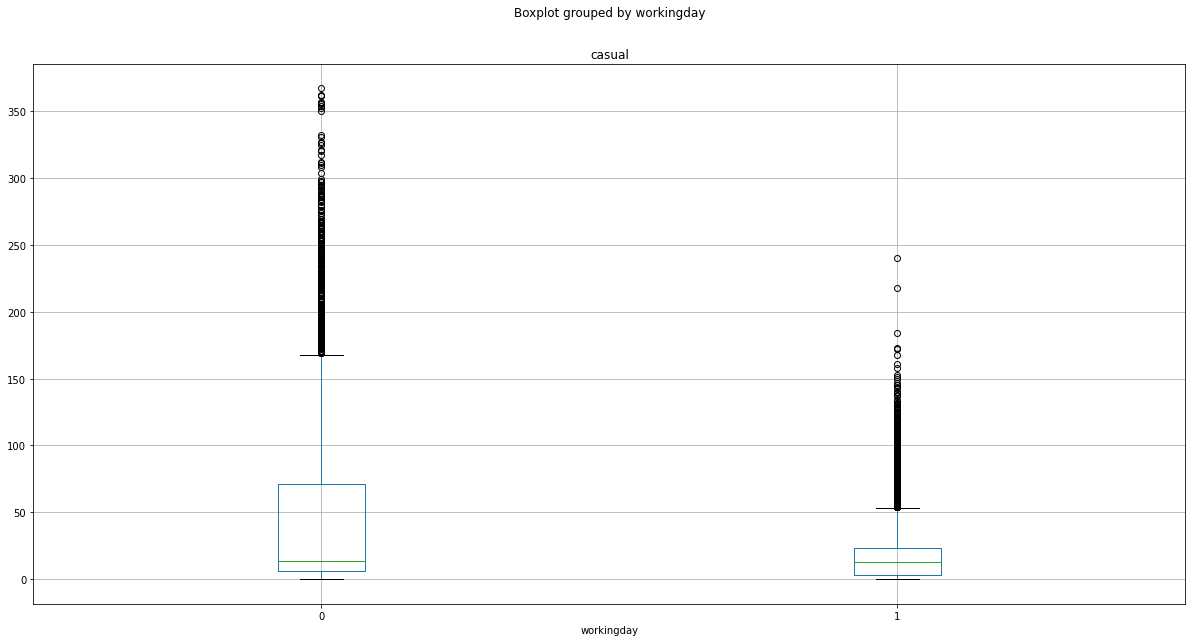

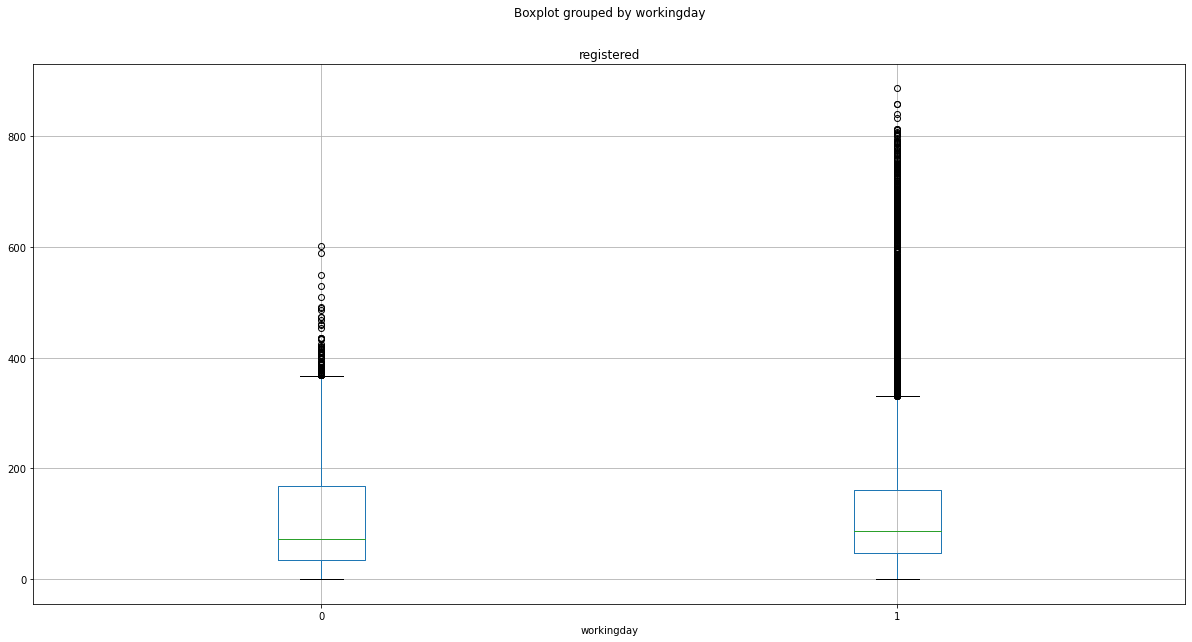

In [185]:
rd.boxplot(column = 'casual', by = 'workingday', figsize=(20,10))
rd.boxplot(column = 'registered', by = 'workingday', figsize=(20,10))

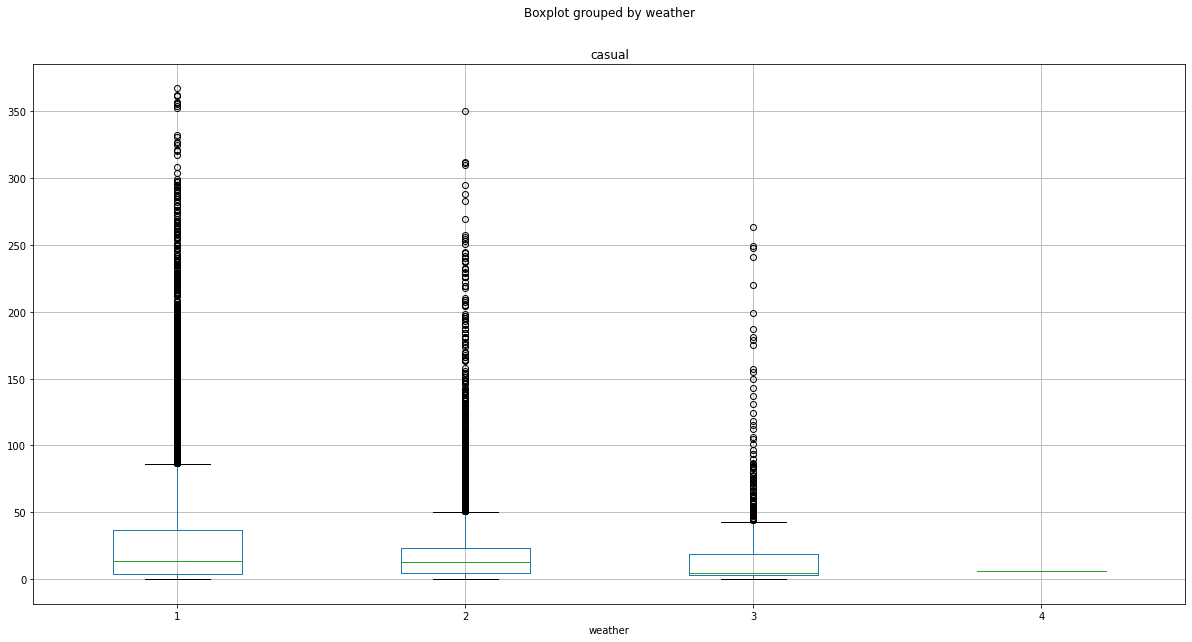

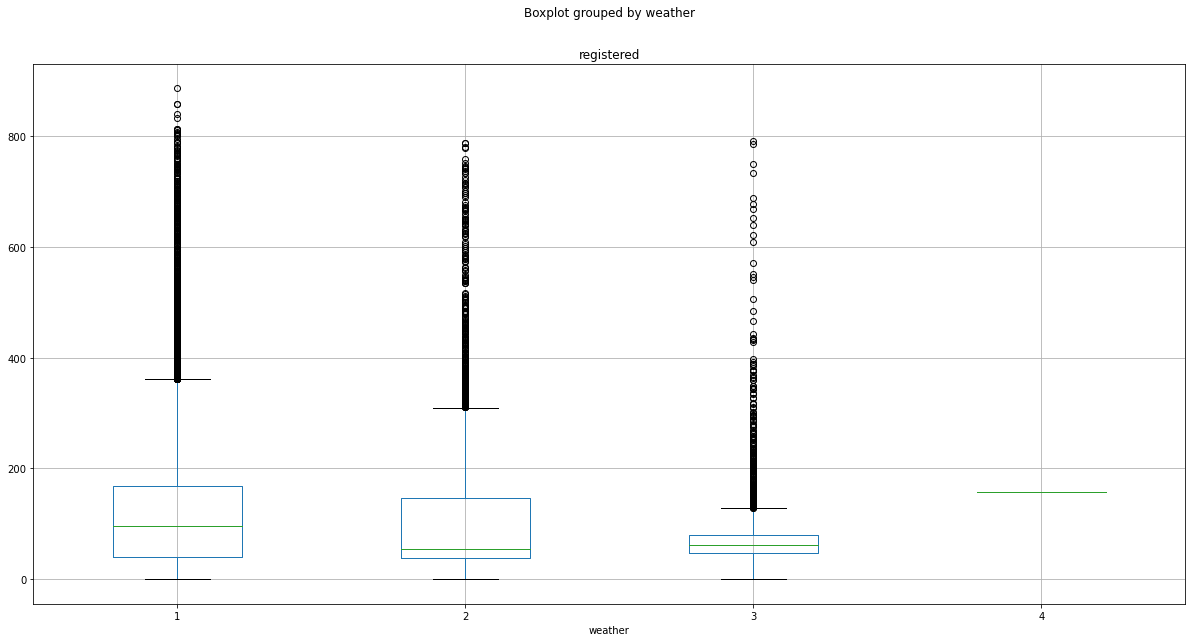

In [193]:
rd.boxplot(column = 'casual', by = 'weather', figsize=(20,10))
rd.boxplot(column = 'registered', by = 'weather', figsize=(20,10))

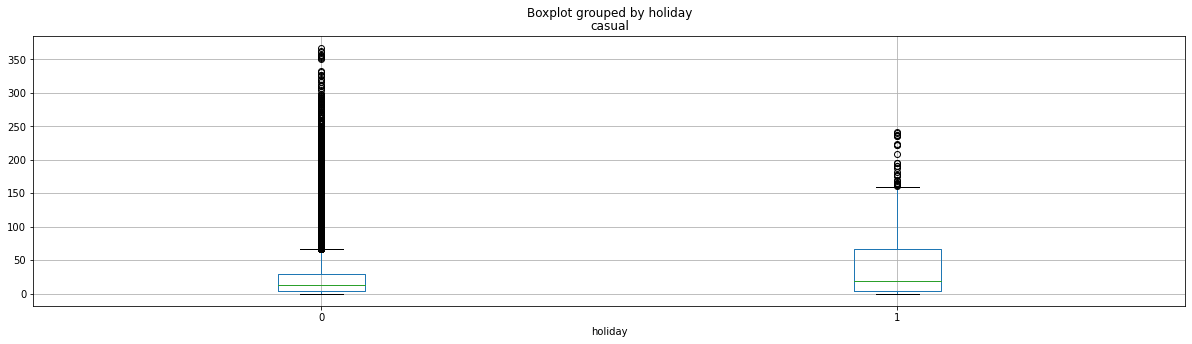

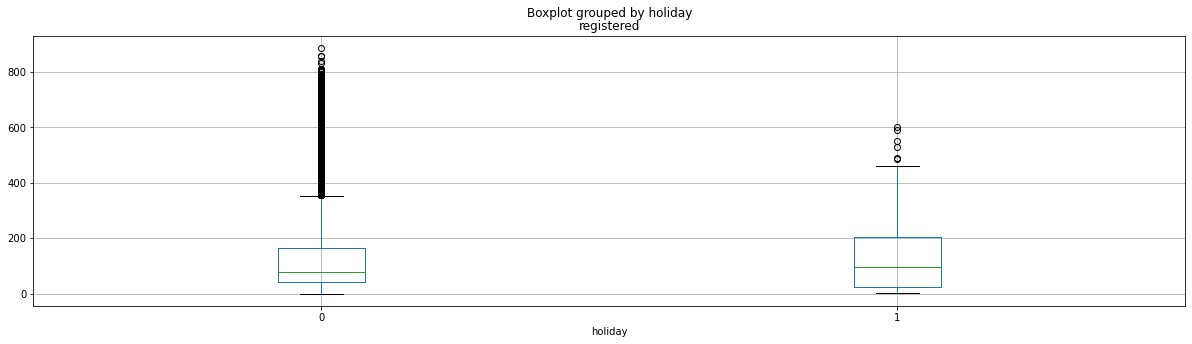

In [194]:
rd.boxplot(column='casual', by='holiday', figsize=(20,5))
rd.boxplot(column='registered', by='holiday', figsize=(20,5))

## boxplot, scatter 외 다른 그래프들

- 상관관계 (corelation)

In [198]:
# 상관관계 함수 (대각요소들은 전부 1)
rd.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,day,hour,month,year
season,1.000000,0.018325,0.081011,0.064534,0.263680,0.274665,0.221953,-0.207521,0.088433,0.159331,0.155572,-0.081349,-0.014390,-0.016292,0.970935,-0.024681
holiday,0.018325,1.000000,-0.206639,0.004444,-0.008071,-0.014075,-0.017757,0.014751,0.062762,0.008809,0.024191,-0.152668,-0.079875,-0.067121,-0.003862,0.007241
workingday,0.081011,-0.206639,1.000000,0.077099,0.060921,0.045523,0.107748,-0.036909,-0.282996,0.085534,-0.005509,-0.739135,0.023893,0.018092,0.058167,0.015334
weather,0.064534,0.004444,0.077099,1.000000,0.113102,0.101883,0.422832,-0.017673,-0.124420,-0.109552,-0.124105,-0.073305,0.009990,0.001046,0.045276,-0.002116
temp,0.263680,-0.008071,0.060921,0.113102,1.000000,0.985600,0.085975,-0.130301,0.425530,0.296317,0.359655,-0.049925,0.003466,0.085376,0.269265,0.059426
atemp,0.274665,-0.014075,0.045523,0.101883,0.985600,1.000000,0.102719,-0.178647,0.426134,0.295468,0.359115,-0.049871,0.002764,0.082641,0.282779,0.063891
humidity,0.221953,-0.017757,0.107748,0.422832,0.085975,0.102719,1.000000,-0.381430,-0.332216,-0.267310,-0.310531,-0.056334,0.161054,0.011079,0.211446,-0.033166
windspeed,-0.207521,0.014751,-0.036909,-0.017673,-0.130301,-0.178647,-0.381430,1.000000,0.055832,0.041257,0.049155,0.000742,-0.002631,0.059405,-0.225642,-0.127883
casual,0.088433,0.062762,-0.282996,-0.124420,0.425530,0.426134,-0.332216,0.055832,1.000000,0.546982,0.721682,0.217132,-0.168373,0.024538,0.091156,0.131135
registered,0.159331,0.008809,0.085534,-0.109552,0.296317,0.295468,-0.267310,0.041257,0.546982,1.000000,0.974239,-0.041107,-0.213189,0.025647,0.165492,0.244670


In [199]:
# 그림으로 데이터의 상관관계를 보기
rd.corr().style.background_gradient()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,day,hour,month,year
season,1.000000,0.018325,0.081011,0.064534,0.263680,0.274665,0.221953,-0.207521,0.088433,0.159331,0.155572,-0.081349,-0.014390,-0.016292,0.970935,-0.024681
holiday,0.018325,1.000000,-0.206639,0.004444,-0.008071,-0.014075,-0.017757,0.014751,0.062762,0.008809,0.024191,-0.152668,-0.079875,-0.067121,-0.003862,0.007241
workingday,0.081011,-0.206639,1.000000,0.077099,0.060921,0.045523,0.107748,-0.036909,-0.282996,0.085534,-0.005509,-0.739135,0.023893,0.018092,0.058167,0.015334
weather,0.064534,0.004444,0.077099,1.000000,0.113102,0.101883,0.422832,-0.017673,-0.124420,-0.109552,-0.124105,-0.073305,0.009990,0.001046,0.045276,-0.002116
temp,0.263680,-0.008071,0.060921,0.113102,1.000000,0.985600,0.085975,-0.130301,0.425530,0.296317,0.359655,-0.049925,0.003466,0.085376,0.269265,0.059426
atemp,0.274665,-0.014075,0.045523,0.101883,0.985600,1.000000,0.102719,-0.178647,0.426134,0.295468,0.359115,-0.049871,0.002764,0.082641,0.282779,0.063891
humidity,0.221953,-0.017757,0.107748,0.422832,0.085975,0.102719,1.000000,-0.381430,-0.332216,-0.267310,-0.310531,-0.056334,0.161054,0.011079,0.211446,-0.033166
windspeed,-0.207521,0.014751,-0.036909,-0.017673,-0.130301,-0.178647,-0.381430,1.000000,0.055832,0.041257,0.049155,0.000742,-0.002631,0.059405,-0.225642,-0.127883
casual,0.088433,0.062762,-0.282996,-0.124420,0.425530,0.426134,-0.332216,0.055832,1.000000,0.546982,0.721682,0.217132,-0.168373,0.024538,0.091156,0.131135
registered,0.159331,0.008809,0.085534,-0.109552,0.296317,0.295468,-0.267310,0.041257,0.546982,1.000000,0.974239,-0.041107,-0.213189,0.025647,0.165492,0.244670


In [203]:
# 더 예쁘게 그려보기                            (0이하 숫자들을 잘라내기)
rd.corr().style.background_gradient().set_precision(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,day,hour,month,year
season,1.00,0.02,0.08,0.06,0.26,0.27,0.22,-0.21,0.09,0.16,0.16,-0.08,-0.01,-0.02,0.97,-0.02
holiday,0.02,1.00,-0.21,0.00,-0.01,-0.01,-0.02,0.01,0.06,0.01,0.02,-0.15,-0.08,-0.07,-0.00,0.01
workingday,0.08,-0.21,1.00,0.08,0.06,0.05,0.11,-0.04,-0.28,0.09,-0.01,-0.74,0.02,0.02,0.06,0.02
weather,0.06,0.00,0.08,1.00,0.11,0.10,0.42,-0.02,-0.12,-0.11,-0.12,-0.07,0.01,0.00,0.05,-0.00
temp,0.26,-0.01,0.06,0.11,1.00,0.99,0.09,-0.13,0.43,0.30,0.36,-0.05,0.00,0.09,0.27,0.06
atemp,0.27,-0.01,0.05,0.10,0.99,1.00,0.10,-0.18,0.43,0.30,0.36,-0.05,0.00,0.08,0.28,0.06
humidity,0.22,-0.02,0.11,0.42,0.09,0.10,1.00,-0.38,-0.33,-0.27,-0.31,-0.06,0.16,0.01,0.21,-0.03
windspeed,-0.21,0.01,-0.04,-0.02,-0.13,-0.18,-0.38,1.00,0.06,0.04,0.05,0.00,-0.00,0.06,-0.23,-0.13
casual,0.09,0.06,-0.28,-0.12,0.43,0.43,-0.33,0.06,1.00,0.55,0.72,0.22,-0.17,0.02,0.09,0.13
registered,0.16,0.01,0.09,-0.11,0.30,0.30,-0.27,0.04,0.55,1.00,0.97,-0.04,-0.21,0.03,0.17,0.24


특정 부분을 자세하게 파악해보기 

In [204]:
rd.corr().iloc[:,8:11]

,casual,registered,count
season,0.088433,0.159331,0.155572
holiday,0.062762,0.008809,0.024191
workingday,-0.282996,0.085534,-0.005509
weather,-0.124420,-0.109552,-0.124105
temp,0.425530,0.296317,0.359655
atemp,0.426134,0.295468,0.359115
humidity,-0.332216,-0.267310,-0.310531
windspeed,0.055832,0.041257,0.049155
casual,1.000000,0.546982,0.721682
registered,0.546982,1.000000,0.974239


In [208]:
rd.corr().loc[:,['casual','registered','count']].style.background_gradient().set_precision(2)

,casual,registered,count
season,0.09,0.16,0.16
holiday,0.06,0.01,0.02
workingday,-0.28,0.09,-0.01
weather,-0.12,-0.11,-0.12
temp,0.43,0.30,0.36
atemp,0.43,0.30,0.36
humidity,-0.33,-0.27,-0.31
windspeed,0.06,0.04,0.05
casual,1.00,0.55,0.72
registered,0.55,1.00,0.97


In [209]:
rd.corr().iloc[0:5,8:11].style.background_gradient().set_precision(2)

,casual,registered,count
season,0.09,0.16,0.16
holiday,0.06,0.01,0.02
workingday,-0.28,0.09,-0.01
weather,-0.12,-0.11,-0.12
temp,0.43,0.30,0.36


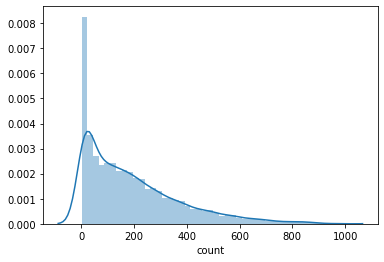

In [212]:
data = rd['count']
sns.distplot(data, kde=True)